In [4]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [5]:
cols = ['body','sentiment']
df = pd.read_excel("filex.xlsx")
df.head()

,Body,Sentiment
0,I like to ensure you that we should need some ...,1
1,We have to have some political power practicin...,1
2,We have to make sure that the local political ...,1
3,We have to do the infected the management by i...,1
4,The local political power practicing leader sh...,1


In [6]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [7]:
pat2 = r'https?://[^ ]+'
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def mail_cleaner(text):
    #soup = BeautifulSoup(text, 'lxml')
    #souped = soup.get_text()
    #try:
      #  bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    #except:
       # bom_removed = souped
    stripped = re.sub(pat2, '', text)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [8]:
clean_mail_texts = []
for i in range(0,len(df)):
    if( (i+1)%100 == 0 ):
        print (" %d of %d has been processed" % ( i+1, len(df) ))                                                                    
    clean_mail_texts.append(mail_cleaner(df['Body'][i]))
    

 100 of 9639 has been processed
 200 of 9639 has been processed
 300 of 9639 has been processed
 400 of 9639 has been processed
 500 of 9639 has been processed
 600 of 9639 has been processed
 700 of 9639 has been processed
 800 of 9639 has been processed
 900 of 9639 has been processed
 1000 of 9639 has been processed
 1100 of 9639 has been processed
 1200 of 9639 has been processed
 1300 of 9639 has been processed
 1400 of 9639 has been processed
 1500 of 9639 has been processed
 1600 of 9639 has been processed
 1700 of 9639 has been processed
 1800 of 9639 has been processed
 1900 of 9639 has been processed
 2000 of 9639 has been processed
 2100 of 9639 has been processed
 2200 of 9639 has been processed
 2300 of 9639 has been processed
 2400 of 9639 has been processed
 2500 of 9639 has been processed
 2600 of 9639 has been processed
 2700 of 9639 has been processed
 2800 of 9639 has been processed
 2900 of 9639 has been processed
 3000 of 9639 has been processed
 3100 of 9639 has b

In [9]:
clean_df = pd.DataFrame(clean_mail_texts,columns=['body'])
clean_df['sentiment'] = df.Sentiment
clean_df.to_csv('clean_mail.csv',encoding='utf-8')

In [10]:
csv = 'clean_mail.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,body,sentiment
0,like to ensure you that we should need some po...,1
1,we have to have some political power practicin...,1
2,we have to make sure that the local political ...,1
3,we have to do the infected the management by i...,1
4,the local political power practicing leader sh...,1


In [11]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9639 entries, 0 to 9638
Data columns (total 2 columns):
body         9634 non-null object
sentiment    9639 non-null int64
dtypes: int64(1), object(1)
memory usage: 225.9+ KB


In [12]:
my_df[my_df.isnull().any(axis=1)].head()

,body,sentiment
1884,NaN,0
3428,NaN,0
4210,NaN,0
4651,NaN,0
4952,NaN,0


In [13]:
neg_mail = my_df[my_df.sentiment == 0]
neg_string = []
for t in neg_mail.body:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

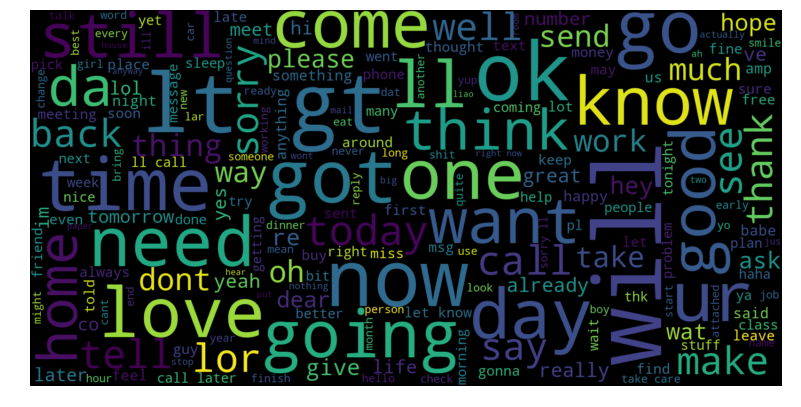

In [14]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

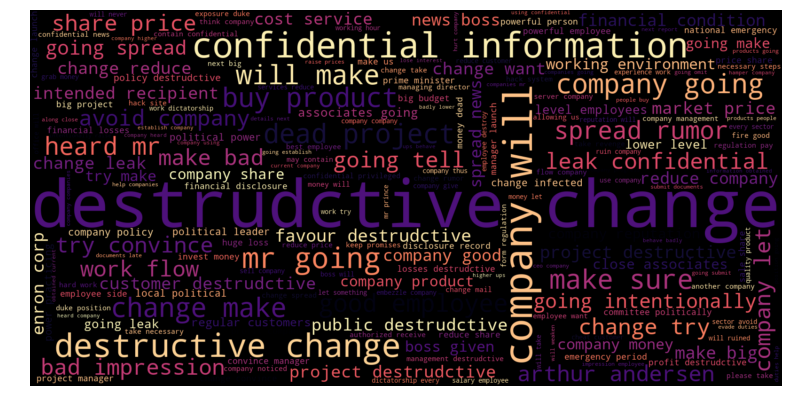

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 2 columns):
body         9634 non-null object
sentiment    9634 non-null int64
dtypes: int64(1), object(1)
memory usage: 150.6+ KB


In [15]:
pos_tweets = my_df[my_df.sentiment == 1]
pos_string = []
for t in pos_tweets.body:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()
x = my_df.body
y = my_df.sentiment

In [16]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.01, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

C:\Users\Iram Sagor\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score

def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if len(x_test[y_test == 0]) / (len(x_test)*1.) > 0.5:
        null_accuracy = len(x_test[y_test == 0]) / (len(x_test)*1.)
    else:
        null_accuracy = 1. - (len(x_test[y_test == 0]) / (len(x_test)*1.))
    t0 = time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, train_test_time

In [18]:
cvec = CountVectorizer()
lr = LogisticRegression()
n_features = np.arange(10000,100001,10000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 2), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print ("Validation result for {} features".format(n))
        nfeature_accuracy,tt_time = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy,tt_time))
    return result

In [19]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Validation result for 10000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.41s
--------------------------------------------------------------------------------
Validation result for 20000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.52s
--------------------------------------------------------------------------------
Validation result for 30000 features
null accuracy: 56.25%
accuracy score: 100.00%
model is 43.75% more accurate than null accuracy
train and test time: 0.51s
-------------------------------------------------------

In [26]:
stop_word = ['now','ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()
lr = LogisticRegression()
tvec.set_params(stop_words=stop_word, max_features=80000, ngram_range=(1,2))
pipeline = Pipeline([
            ('vectorizer', tvec),
            ('classifier', lr)
        ])
sentiment_fit = pipeline.fit(x_train, y_train)
y_pred = sentiment_fit.predict(["change"])
y_pred[0]

1